In [23]:
using Plots
using DataFrames
using Statistics
using CSV

In [70]:
data = CSV.read("results.csv")

,size,vector_ns,matrix_ns
,Int64⍰,Int64⍰,Int64⍰
1,10,818,1861
2,10,346,1270
3,10,195,696
4,10,154,698
5,10,172,797
6,10,222,1404
7,10,161,974
8,10,165,874
9,10,794,683


In [71]:
data_processed = by(data, :size, df->DataFrame(vector_avg=mean(df[:vector_ns]), vector_std=std(df[:vector_ns]),
    matrix_avg=mean(df[:matrix_ns]), matrix_std=std(df[:matrix_ns])))

,size,vector_avg,vector_std,matrix_avg,matrix_std
,Int64⍰,Float64,Float64,Float64,Float64
1,10,318.4,263.29,976.9,415.28
2,15,218.2,35.0454,1185.7,289.32
3,20,222.8,19.2458,1606.1,123.595
4,25,262.3,38.8589,2492.1,417.566
5,30,300.0,51.5148,3722.0,458.635
6,35,303.2,4.07704,5602.2,708.104
7,40,446.1,156.476,8252.1,1262.29
8,45,450.1,121.627,11131.9,2238.68
9,50,607.2,217.451,15175.4,1259.13


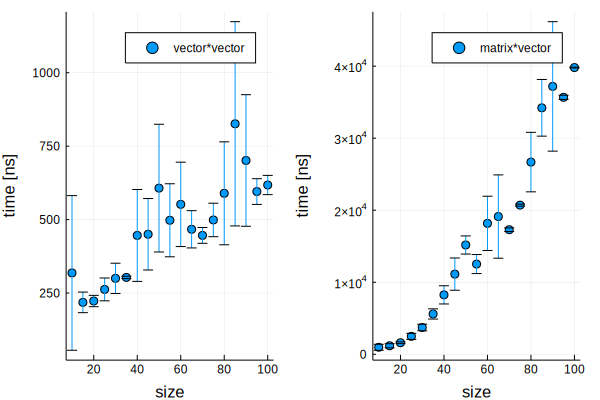

In [73]:
scatter(data_processed[:size], [data_processed[:vector_avg], data_processed[:matrix_avg]],
    yerr=[data_processed[:vector_std] data_processed[:matrix_std]], layout=2,
    xlabel="size", ylabel="time [ns]", labels=["vector*vector" "matrix*vector"])